In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = 'aus_real_estate.csv'  
# Update this path with the correct location of your CSV file
real_estate_data = pd.read_csv(file_path)

# Calculate the correlation matrix
correlation_matrix = real_estate_data[['Price', 'Bedrooms', 'Bathrooms']].corr()

# Display the correlation matrix
print(correlation_matrix)



              Price  Bedrooms  Bathrooms
Price      1.000000 -0.007973  -0.009355
Bedrooms  -0.007973  1.000000   0.007149
Bathrooms -0.009355  0.007149   1.000000


Text(0, 0.5, 'Price')

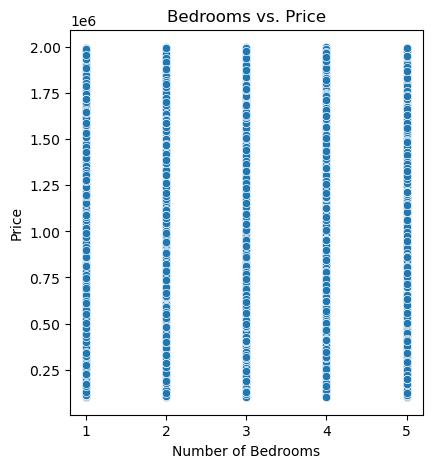

In [6]:
# Plotting the data
plt.figure(figsize=(10, 5))

# Bedrooms vs. Price
plt.subplot(1, 2, 1)
sns.scatterplot(data=real_estate_data, x='Bedrooms', y='Price')
plt.title('Bedrooms vs. Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')

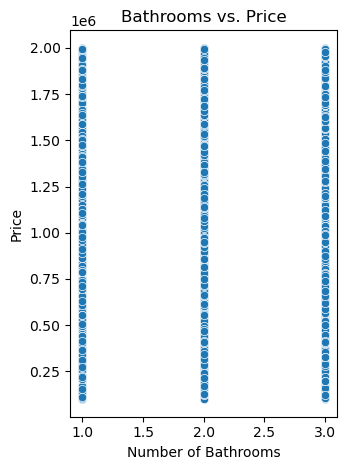

In [7]:
# Bathrooms vs. Price
plt.subplot(1, 2, 2)
sns.scatterplot(data=real_estate_data, x='Bathrooms', y='Price')
plt.title('Bathrooms vs. Price')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


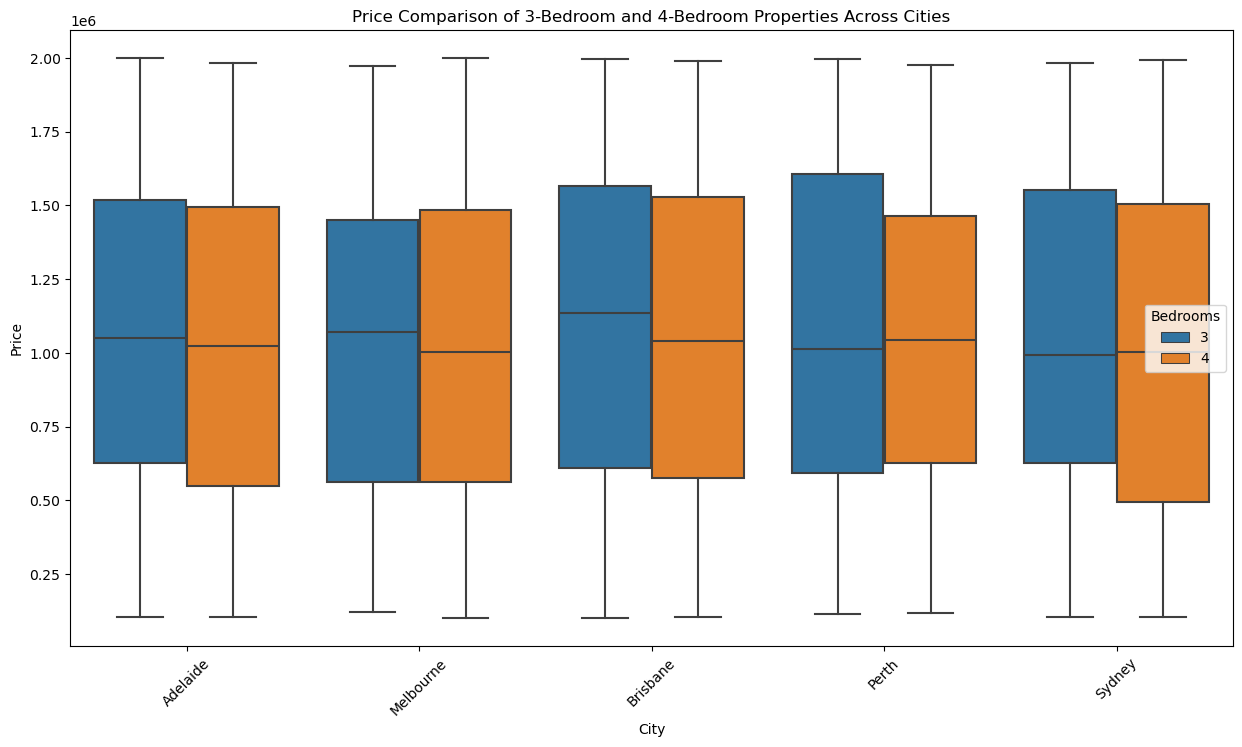

In [8]:
# Filter data for 3-bedroom and 4-bedroom properties
bedroom_data = real_estate_data[(real_estate_data['Bedrooms'] == 3) | (real_estate_data['Bedrooms'] == 4)]

# Create a box plot to compare prices of 3-bedroom and 4-bedroom properties across different cities
plt.figure(figsize=(15, 8))
sns.boxplot(data=bedroom_data, x='City', y='Price', hue='Bedrooms')
plt.title('Price Comparison of 3-Bedroom and 4-Bedroom Properties Across Cities')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.legend(title='Bedrooms')
plt.show()


         City Bedrooms  median_price    mean_price      price_std
0    Adelaide        1     1015659.0  1.039256e+06  518204.216238
1    Adelaide        2     1003448.0  1.014982e+06  571531.688682
2    Adelaide        3     1050667.5  1.062802e+06  548169.930361
3    Adelaide        4     1022451.0  1.020614e+06  549983.766275
4    Adelaide        5      963402.0  1.020056e+06  547396.237523
5    Brisbane        1     1054276.5  1.064682e+06  560757.986170
6    Brisbane        2     1046485.0  1.089467e+06  542204.462542
7    Brisbane        3     1134210.5  1.101882e+06  559917.437129
8    Brisbane        4     1041538.0  1.040072e+06  559216.950866
9    Brisbane        5     1134124.0  1.067047e+06  558383.650066
10  Melbourne        1      987214.0  1.029338e+06  561875.635022
11  Melbourne        2     1080311.0  1.073301e+06  581084.268734
12  Melbourne        3     1071871.0  1.029615e+06  539484.161774
13  Melbourne        4     1003516.0  1.024710e+06  542474.242554
14  Melbou

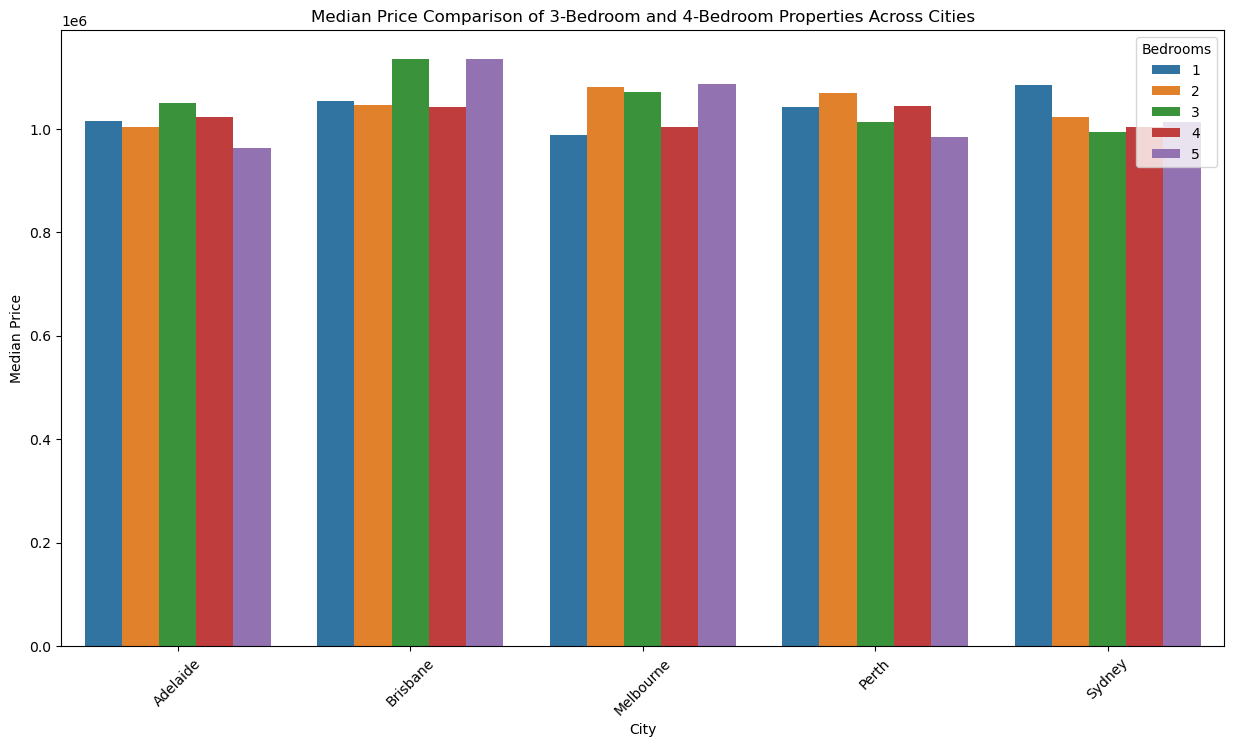

In [15]:
# Group data by City and Bedrooms
grouped_data = real_estate_data.groupby(['City', 'Bedrooms']).agg(
    median_price=('Price', 'median'),
    mean_price=('Price', 'mean'),
    price_std=('Price', 'std')
).reset_index()

# Display the summarized data
print(grouped_data)

# Plot the summarized data
plt.figure(figsize=(15, 8))

# Plot median prices
sns.barplot(data=grouped_data, x='City', y='median_price', hue='Bedrooms')
plt.title('Median Price Comparison of 3-Bedroom and 4-Bedroom Properties Across Cities')
plt.xlabel('City')
plt.ylabel('Median Price')
plt.xticks(rotation=45)
plt.legend(title='Bedrooms')
plt.show()
